<a href="https://colab.research.google.com/github/harshh-2/Telco_Customer_Churn_predictor/blob/main/ICSSR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Uploading and cleaning the data

In [88]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data = data.drop(['customerID'] , axis =1)
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
data.drop(labels=data[data['tenure'] == 0].index, axis=0, inplace=True)
data = pd.get_dummies(data, drop_first=True)
data = data.drop_duplicates()

Training-Validation split from the data

In [89]:
X = data.drop('Churn_Yes' , axis =1)
y= data['Churn_Yes']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42 , stratify = y)

Logistic Regression used as baseline model for binary classification

In [90]:
model = LogisticRegression(max_iter=5000, random_state=42, penalty='l1',
    solver='liblinear')
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_val)
print("LOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_val, y_pred_lr)*100)
print("Precision:", precision_score(y_val, y_pred_lr)*100)
print("Recall:", recall_score(y_val, y_pred_lr)*100)
print("F1 Score:", f1_score(y_val, y_pred_lr)*100)
print("\nClassification Report:\n", classification_report(y_val, y_pred_lr))

LOGISTIC REGRESSION RESULTS
Accuracy: 80.81312410841655
Precision: 67.11409395973155
Recall: 53.908355795148246
F1 Score: 59.79073243647235

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.87      1031
        True       0.67      0.54      0.60       371

    accuracy                           0.81      1402
   macro avg       0.76      0.72      0.74      1402
weighted avg       0.80      0.81      0.80      1402



Random Forest Classifier used as improved model for binary classification

In [91]:
model2 = RandomForestClassifier(n_estimators=400,class_weight='balanced',random_state=42)
model2.fit(X_train, y_train)
y_pred_rf = model2.predict(X_val)
print("RANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_val, y_pred_rf)*100)
print("Precision:", precision_score(y_val, y_pred_rf)*100)
print("Recall:", recall_score(y_val, y_pred_rf)*100)
print("F1 Score:", f1_score(y_val, y_pred_rf)*100)
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

RANDOM FOREST RESULTS
Accuracy: 78.9586305278174
Precision: 64.17910447761194
Recall: 46.36118598382749
F1 Score: 53.834115805946794

Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.91      0.86      1031
        True       0.64      0.46      0.54       371

    accuracy                           0.79      1402
   macro avg       0.73      0.69      0.70      1402
weighted avg       0.78      0.79      0.78      1402



Comparasion between baseline and improved model based upon accuracy, precision, recall, and F1 score

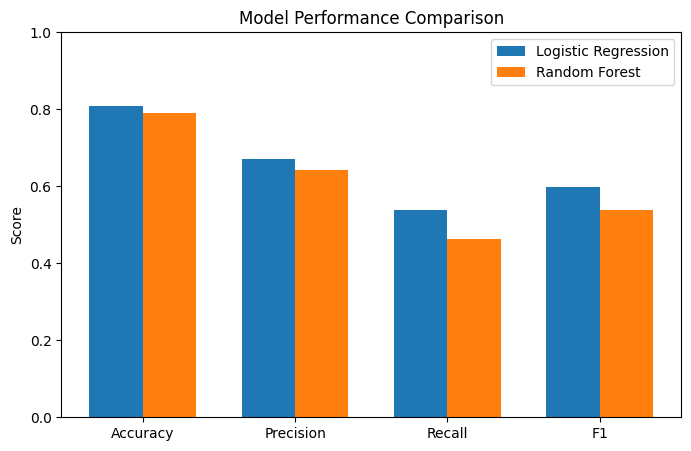

In [92]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

lr_scores = [
    accuracy_score(y_val, y_pred_lr),
    precision_score(y_val, y_pred_lr),
    recall_score(y_val, y_pred_lr),
    f1_score(y_val, y_pred_lr)
]

rf_scores = [
    accuracy_score(y_val, y_pred_rf),
    precision_score(y_val, y_pred_rf),
    recall_score(y_val, y_pred_rf),
    f1_score(y_val, y_pred_rf)
]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, lr_scores, width, label='Logistic Regression')
plt.bar(x + width/2, rf_scores, width, label='Random Forest')

plt.xticks(x, metrics)
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.ylim(0,1)
plt.show()

Confusion Matrix for both the models

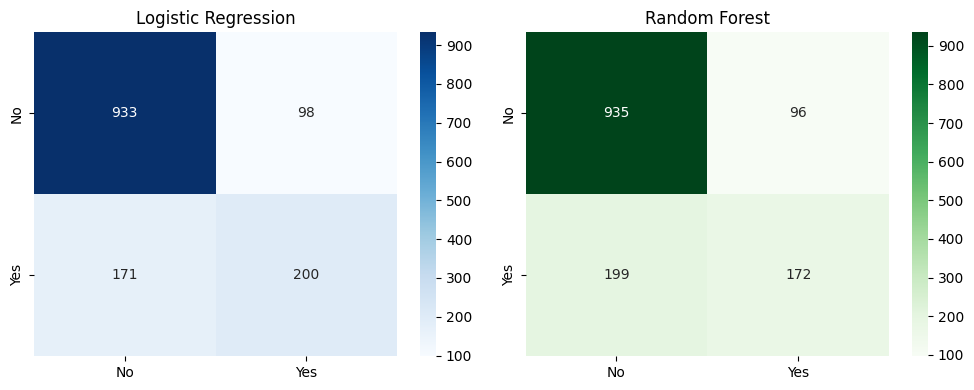

In [93]:
cm_lr = confusion_matrix(y_val, y_pred_lr)
cm_rf = confusion_matrix(y_val, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=["No","Yes"],
            yticklabels=["No","Yes"],
            ax=axes[0])
axes[0].set_title("Logistic Regression")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=["No","Yes"],
            yticklabels=["No","Yes"],
            ax=axes[1])
axes[1].set_title("Random Forest")

plt.tight_layout()
plt.show()

We can conclude that Logistic Regression proves to be a better model for this particular use case comapared to Random Forest Classification
for this telco customer churn binary classification.